In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import env
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('customers.csv')

In [59]:
df = df[['Delicassen','Frozen']]

In [60]:
np_array = df.values.astype('float32',copy = False)

In [61]:
minmax_scaler = MinMaxScaler().fit(np_array)

In [62]:
minmax_scaler.transform(np_array)

array([[2.78473105e-02, 3.10630468e-03],
       [3.69837321e-02, 2.85484213e-02],
       [1.63558617e-01, 3.91164310e-02],
       [3.72340456e-02, 1.04841895e-01],
       [1.08093455e-01, 6.39339983e-02],
       [3.02044246e-02, 1.05351396e-02],
       [1.13057988e-02, 7.47814076e-03],
       [5.34626655e-02, 2.70199217e-02],
       [1.55819776e-02, 6.57418976e-03],
       [4.37004603e-02, 1.86378285e-02],
       [3.63162309e-02, 7.19052032e-02],
       [1.03045478e-02, 2.29274873e-02],
       [6.10763468e-02, 4.30609426e-03],
       [1.24947857e-02, 5.04569076e-02],
       [4.51606214e-02, 4.42114286e-03],
       [8.53149779e-03, 6.11399673e-03],
       [2.24655829e-02, 1.79146673e-03],
       [9.33458507e-02, 1.33784767e-02],
       [6.62911981e-02, 3.58293355e-02],
       [1.03879850e-02, 1.05844466e-02],
       [4.42428067e-02, 1.71093307e-02],
       [1.18064247e-02, 5.51903248e-02],
       [9.03420970e-02, 1.54214069e-01],
       [3.44597429e-01, 8.42975527e-02],
       [1.204630

In [63]:
dbsc = DBSCAN(eps=.3,min_samples=2).fit(np_array)

In [64]:
dbsc = DBSCAN(eps=.3,min_samples=2).fit(np_array)
labels = dbsc.labels_
df['labels'] = labels

In [65]:
df['labels'] = labels

In [79]:
df.head(2)

,bedrooms,sqft
0,4.0,1604.0
1,3.0,2384.0


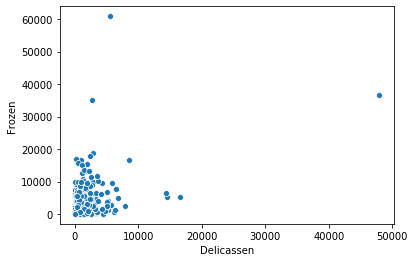

In [58]:
sns.scatterplot(x = 'Delicassen',y='Frozen',data=df)

In [69]:
url = env.get_db_url('zillow')
#
def wrangle_zillow():
    df = pd.read_sql("""

SELECT 
p17.transactiondate,p.id,p.bathroomcnt as bathrooms,p.bedroomcnt as bedrooms, p.calculatedfinishedsquarefeet as sqft, p.taxvaluedollarcnt as tax_value
FROM propertylandusetype pl
JOIN
properties_2017 p ON p.propertylandusetypeid = pl.propertylandusetypeid
JOIN
predictions_2017 p17 ON p17.id = p.id
WHERE 
p.propertylandusetypeid in (279,261) 
AND 
(p17.transactiondate LIKE '%%2017-05%%' or p17.transactiondate LIKE '%%2017-06%%')
AND
p.calculatedfinishedsquarefeet IS NOT NULL
and
p.bedroomcnt > 0
and 
p.bathroomcnt > 0
and
p.taxvaluedollarcnt > 0
"""
,url)
    return df

In [72]:
df1 = wrangle_zillow()

In [176]:
df1.head(2)

,transactiondate,id,bathrooms,bedrooms,sqft,tax_value
0,2017-06-30,1772,2.0,4.0,1604.0,498347.0
1,2017-06-01,2028,3.0,3.0,2384.0,549917.0


In [177]:
df = df1[['bedrooms','sqft','bathrooms','tax_value']]

In [184]:
df.head(2)

,bedrooms,sqft,bathrooms,tax_value,labels
0,4.0,1604.0,2.0,498347.0,-1
1,3.0,2384.0,3.0,549917.0,-1


In [182]:
np_array = df.values.astype('float32',copy = False)
scaler = StandardScaler().fit(np_array)
scaler.transform(np_array)
dbsc = DBSCAN(eps=3,min_samples=3).fit(np_array)
labels = dbsc.labels_
df['labels'] = labels

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
df[df.labels == -1].shape

(15982, 5)